<a href="https://colab.research.google.com/github/unicornlaunching/stacksAIbuildathon/blob/main/AI_Quickstart_CharismaBTC_Digital_Forensics_on_the_Blockchain_with_Stacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Here is your mission...
###### ...should you choose to accept it.
---

## On September 20th, 2024, CharismaBTC, a staking platform built on Stacks, was exploited for $300k.

# Your job is to find out who did it.

---

Luckily, because everything on the Stacks blockchain is public, you can see the wallet with the exploited $300k here: https://explorer.hiro.so/address/SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK?chain=mainnet

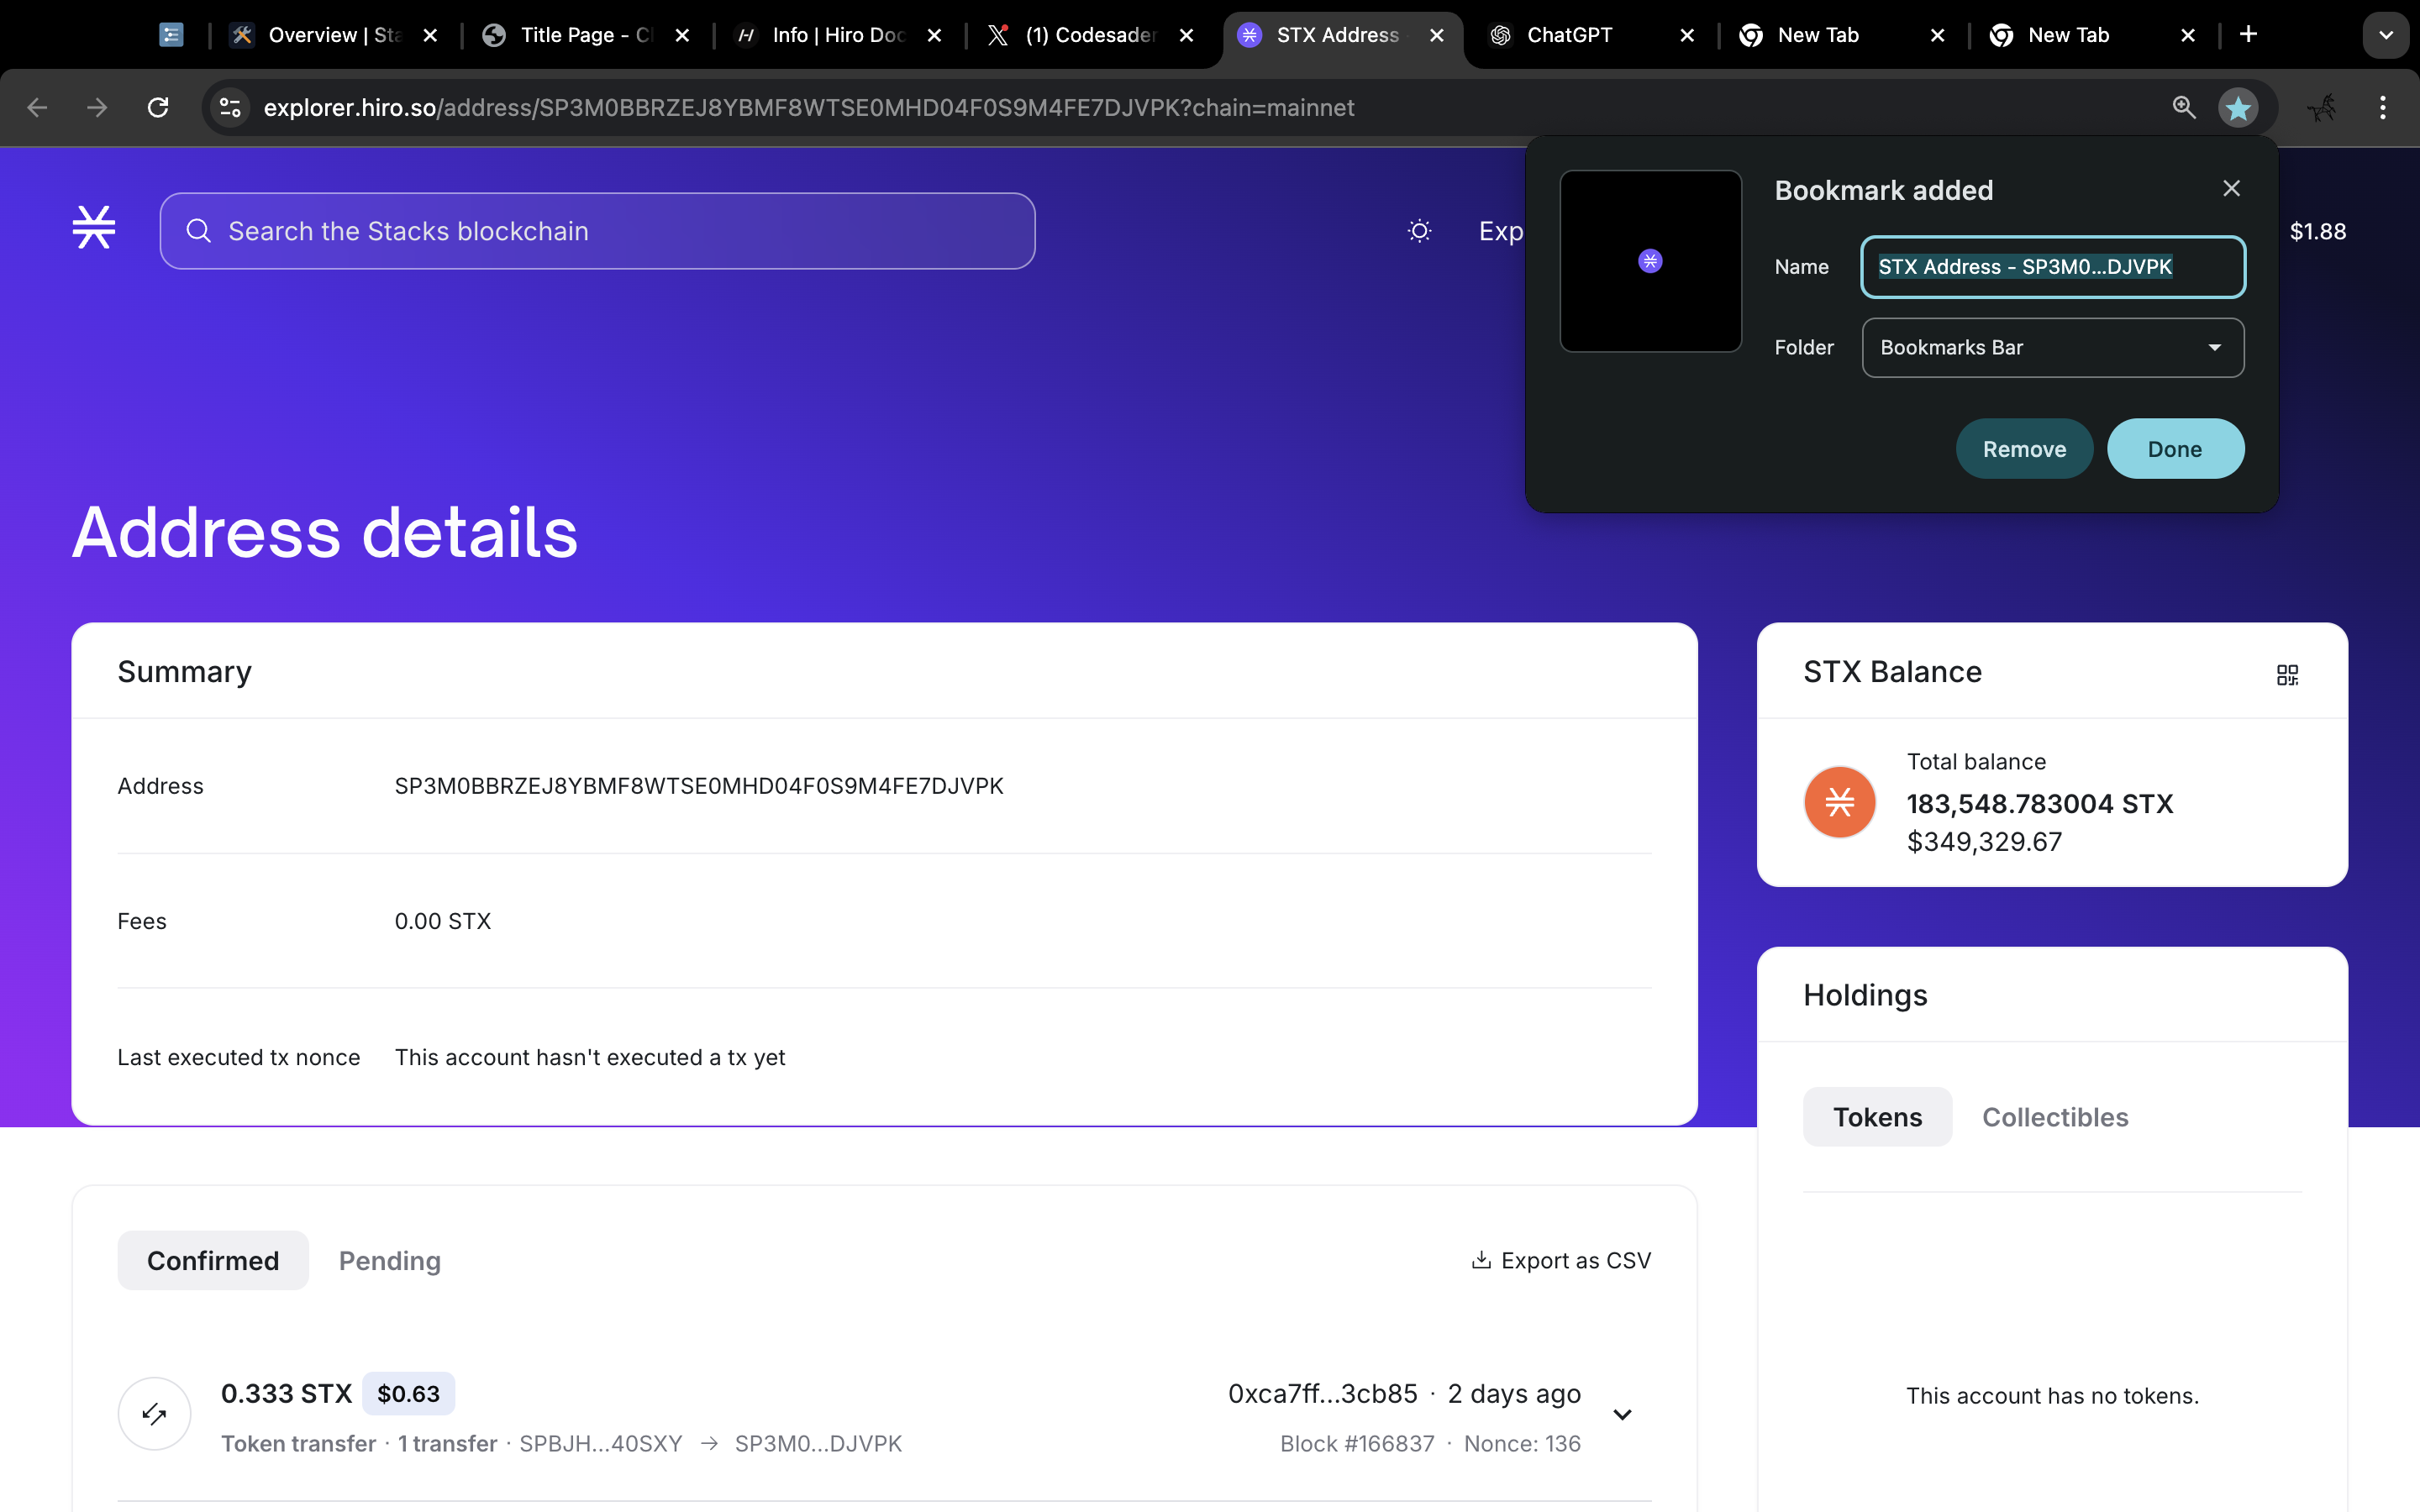

---

# You're probably asking yourself...
## ...how the hell do you expect me to find out who the hacker is?

### It's a good question. Again, one of the cool things about the Stacks blockchain is that all of the transaction are public. That means you have access to them...

###### ...you just need to know how to access them.

---

# 0. Let's Call The Stacks Blockchain Hotline aka Hiro API to get information about the Stacks Blockchain.

In [ ]:
# First, install the requests library if it's not already installed
# Installing requests gives you the ability to process requests from a server
# What does a server do? A server serves you meals; information meals.

!pip install requests

# Then import the requests library and send the GET request
import requests

# The URL for the API request
# An API is like a phone number you can call to get information
url = "https://api.hiro.so/v2/info"

# Sending the GET request
# Let's check to see if we can make a successful call to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'peer_version': 402653194, 'pox_consensus': 'f8c5186a981a7a3baac551e5af702e4d1d3642d5', 'burn_block_height': 862593, 'stable_pox_consensus': '5f17f19f16f1a2f17d24b6e71c1ebb4bb2cf5c27', 'stable_burn_block_height': 862586, 'server_version': 'stacks-node 2.5.0.0.7 (release/2.5.0.0.7:bed29bc, release build, linux [x86_64])', 'network_id': 1, 'parent_network_id': 3652501241, 'stacks_tip_height': 167105, 'stacks_tip': '19bf8dfc4bcd8e27e72934bd56d68031b88b52ab2b25cbef5b1de9f610e3b111', 'stacks_tip_consensus_hash': 'f8c5186a981a7a3baac551e5af702e4d1d3642d5', 'genesis_chainstate_hash': '74237aa39aa50a83de11a4f53e9d3bb7d43461d1de9873f402e5453ae60bc59b', 'unanchored_tip': None, 'unanchored_seq': None, 'exit_at_block_height': None, 'node_public_key': '02620bc5226229ed02846dd277a87e6fc25bc8c621354bc0620ad088b367d76aa6', 'node_public_key_hash': '28c7582ccd946e5fb623d8ecaad925295f4d2bb0', 'affirmations': {'heaviest': 'pppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp

## 0.1 What data did we get back when we called The Hiro Stacks Hotline API?

In [ ]:
print(data)

{'peer_version': 402653194, 'pox_consensus': 'f8c5186a981a7a3baac551e5af702e4d1d3642d5', 'burn_block_height': 862593, 'stable_pox_consensus': '5f17f19f16f1a2f17d24b6e71c1ebb4bb2cf5c27', 'stable_burn_block_height': 862586, 'server_version': 'stacks-node 2.5.0.0.7 (release/2.5.0.0.7:bed29bc, release build, linux [x86_64])', 'network_id': 1, 'parent_network_id': 3652501241, 'stacks_tip_height': 167105, 'stacks_tip': '19bf8dfc4bcd8e27e72934bd56d68031b88b52ab2b25cbef5b1de9f610e3b111', 'stacks_tip_consensus_hash': 'f8c5186a981a7a3baac551e5af702e4d1d3642d5', 'genesis_chainstate_hash': '74237aa39aa50a83de11a4f53e9d3bb7d43461d1de9873f402e5453ae60bc59b', 'unanchored_tip': None, 'unanchored_seq': None, 'exit_at_block_height': None, 'node_public_key': '02620bc5226229ed02846dd277a87e6fc25bc8c621354bc0620ad088b367d76aa6', 'node_public_key_hash': '28c7582ccd946e5fb623d8ecaad925295f4d2bb0', 'affirmations': {'heaviest': 'pppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp

## 0.2 What's the format of the data we got back when we called The Hiro Stacks Hotline API?

In [ ]:
type(data)

dict

## 0.3 Let's make the data we got back when we called The Hiro Stacks Hotline API a bit more cleaner and easier to read.

In [ ]:
import json

# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

{
    "peer_version": 402653194,
    "pox_consensus": "f8c5186a981a7a3baac551e5af702e4d1d3642d5",
    "burn_block_height": 862593,
    "stable_pox_consensus": "5f17f19f16f1a2f17d24b6e71c1ebb4bb2cf5c27",
    "stable_burn_block_height": 862586,
    "server_version": "stacks-node 2.5.0.0.7 (release/2.5.0.0.7:bed29bc, release build, linux [x86_64])",
    "network_id": 1,
    "parent_network_id": 3652501241,
    "stacks_tip_height": 167105,
    "stacks_tip": "19bf8dfc4bcd8e27e72934bd56d68031b88b52ab2b25cbef5b1de9f610e3b111",
    "stacks_tip_consensus_hash": "f8c5186a981a7a3baac551e5af702e4d1d3642d5",
    "genesis_chainstate_hash": "74237aa39aa50a83de11a4f53e9d3bb7d43461d1de9873f402e5453ae60bc59b",
    "unanchored_tip": null,
    "unanchored_seq": null,
    "exit_at_block_height": null,
    "node_public_key": "02620bc5226229ed02846dd277a87e6fc25bc8c621354bc0620ad088b367d76aa6",
    "node_public_key_hash": "28c7582ccd946e5fb623d8ecaad925295f4d2bb0",
    "affirmations": {
        "heaviest": "

---

# 1.0 Let's Call The Hiro Stacks Hotline API phone number that tells us about the circulating supply.

In [ ]:
# The URL for the API request
url = "https://api.hiro.so/extended/v1/stx_supply/circulating/plain"

# Sending the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

1490393809.61058


## 1.1 Let's Make The Data We Received from The Hiro Stacks Hotline API cleaner and easier to read.

In [ ]:
# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

1490393809.61058


---

# 2.0 Let's Call The Hiro Stacks API Hotline and learn about block times.

In [ ]:
# The URL for the API request
url = "https://api.hiro.so/extended/v1/info/network_block_times"

# Sending the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'mainnet': {'target_block_time': 600}, 'testnet': {'target_block_time': 120}}


## 2.1 Now let's make the data cleaner and easier to read.

In [ ]:
# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

{
    "mainnet": {
        "target_block_time": 600
    },
    "testnet": {
        "target_block_time": 120
    }
}


---

# 3.0 Let's Call The Stacks Blockchain Hotline API and get Recent Data About the Chain Itself

In [ ]:
# The URL for the API request
url = "https://api.hiro.so/extended"

# Sending the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'server_version': 'stacks-blockchain-api v8.0.0 (master:a38a35faa)', 'status': 'ready', 'pox_v1_unlock_height': 781552, 'pox_v2_unlock_height': 787652, 'pox_v3_unlock_height': 840361, 'chain_tip': {'block_height': 167106, 'block_hash': '0x42faef26bd8098a8ca64bbd272f2cb7ea069e0d7e6c51ab87845acb9d0eb83c3', 'index_block_hash': '0x9414f33a8e5f31856c7d82d0adada665ce751ae973fd2520dffd6724678ec572', 'burn_block_height': 862594}}


## 3.1 Now let's clean up the data so it's easier to read.

In [ ]:
# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

{
    "server_version": "stacks-blockchain-api v8.0.0 (master:a38a35faa)",
    "status": "ready",
    "pox_v1_unlock_height": 781552,
    "pox_v2_unlock_height": 787652,
    "pox_v3_unlock_height": 840361,
    "chain_tip": {
        "block_height": 167106,
        "block_hash": "0x42faef26bd8098a8ca64bbd272f2cb7ea069e0d7e6c51ab87845acb9d0eb83c3",
        "index_block_hash": "0x9414f33a8e5f31856c7d82d0adada665ce751ae973fd2520dffd6724678ec572",
        "burn_block_height": 862594
    }
}


---

# 4.0 Let's call The Stacks Blockchain API Hotline and get Block Height Data

In [ ]:
# The URL for the API request
url = "https://api.hiro.so/extended/v1/stx_supply?height=200"

# Sending the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'unlocked_percent': '55.36', 'total_stx': '1818000000.000000', 'unlocked_stx': '1006470761.019817', 'block_height': 200}


## 4.1 Now let's make the data easier to read.

In [ ]:
# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

{
    "unlocked_percent": "55.36",
    "total_stx": "1818000000.000000",
    "unlocked_stx": "1006470761.019817",
    "block_height": 200
}


---

# 5.0 Now Let's Analyze The Account That Holds The $300k of Exploited Funds from The CharismaBTC Hack

In [ ]:
# The stacks wallet address containing $300k of the exploited funds can be looked at here: https://explorer.hiro.so/address/SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK?chain=mainnet
# Target account with the exploited CharismaBTC Funds = SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK
# curl -X GET "https://api.hiro.so/extended/v1/address/SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK/assets?limit=20&offset=42000&unanchored=true&until_block=60000"

# The URL for the API request - notice how I used the target account in the url?
url = "https://api.hiro.so/extended/v1/address/SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK/assets"

# Sending the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'limit': 20, 'offset': 0, 'total': 3, 'results': [{'event_index': 0, 'event_type': 'stx_asset', 'tx_id': '0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85', 'asset': {'asset_event_type': 'transfer', 'sender': 'SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY', 'recipient': 'SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK', 'amount': '333000', 'memo': '0x68747470733a2f2f6269742e6c792f626f756e7479706c7a00000000000000000000'}}, {'event_index': 0, 'event_type': 'stx_asset', 'tx_id': '0x8c2e3d38590c31392c44347c2a077c8997aa694c81a9a9ef17b30292dafb01d0', 'asset': {'asset_event_type': 'transfer', 'sender': 'SP1WXD5423MC1W0M4NSE9WF03X0561ARFX3Y9AQ3F', 'recipient': 'SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK', 'amount': '1', 'memo': '0x77696c6c696e6720746f206163636570742062756720626f756e74793f0000000000'}}, {'event_index': 33, 'event_type': 'stx_asset', 'tx_id': '0xa570732b3d733ee33fde841ee4ba4692602241509e3729e0e98ab4ce80ebe024', 'asset': {'asset_event_type': 'transfer', 'sender': 'SP2ZNGJ8

## 5.1 Now let's make the data cleaner and easier to read. What do you notice about the amounts :P

In [ ]:
# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

{
    "limit": 20,
    "offset": 0,
    "total": 3,
    "results": [
        {
            "event_index": 0,
            "event_type": "stx_asset",
            "tx_id": "0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85",
            "asset": {
                "asset_event_type": "transfer",
                "sender": "SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY",
                "recipient": "SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK",
                "amount": "333000",
                "memo": "0x68747470733a2f2f6269742e6c792f626f756e7479706c7a00000000000000000000"
            }
        },
        {
            "event_index": 0,
            "event_type": "stx_asset",
            "tx_id": "0x8c2e3d38590c31392c44347c2a077c8997aa694c81a9a9ef17b30292dafb01d0",
            "asset": {
                "asset_event_type": "transfer",
                "sender": "SP1WXD5423MC1W0M4NSE9WF03X0561ARFX3Y9AQ3F",
                "recipient": "SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK",
  

## 5.2 Now Let's Call The Stacks Blockchain API Hotline to get more information about this stacks wallet that holds the $300k of exploited funds.

In [ ]:
# https://api.hiro.so/extended/v1/address/SP31DA6FTSJX2WGTZ69SFY11BH51NZMB0ZW97B5P0/stx_inbound

# The URL for the API request
url = "https://api.hiro.so/extended/v1/address/SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK/stx_inbound"

# Sending the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'limit': 20, 'offset': 0, 'total': 4, 'results': [{'sender': 'SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY', 'amount': '333000', 'memo': '0x68747470733a2f2f6269742e6c792f626f756e7479706c7a00000000000000000000', 'block_height': 166837, 'tx_id': '0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85', 'transfer_type': 'stx-transfer-memo', 'tx_index': 7}, {'sender': 'SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY', 'amount': '333000', 'memo': '0x68747470733a2f2f6269742e6c792f626f756e7479706c7a00000000000000000000', 'block_height': 166837, 'tx_id': '0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85', 'transfer_type': 'stx-transfer', 'tx_index': 7}, {'sender': 'SP1WXD5423MC1W0M4NSE9WF03X0561ARFX3Y9AQ3F', 'amount': '1', 'memo': '0x77696c6c696e6720746f206163636570742062756720626f756e74793f0000000000', 'block_height': 166799, 'tx_id': '0x8c2e3d38590c31392c44347c2a077c8997aa694c81a9a9ef17b30292dafb01d0', 'transfer_type': 'stx-transfer-memo', 'tx_index': 44}, {'sender': 'SP1

## 5.3 Now let's make the data cleaner and easier to read.

In [ ]:
# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

{
    "limit": 20,
    "offset": 0,
    "total": 4,
    "results": [
        {
            "sender": "SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY",
            "amount": "333000",
            "memo": "0x68747470733a2f2f6269742e6c792f626f756e7479706c7a00000000000000000000",
            "block_height": 166837,
            "tx_id": "0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85",
            "transfer_type": "stx-transfer-memo",
            "tx_index": 7
        },
        {
            "sender": "SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY",
            "amount": "333000",
            "memo": "0x68747470733a2f2f6269742e6c792f626f756e7479706c7a00000000000000000000",
            "block_height": 166837,
            "tx_id": "0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85",
            "transfer_type": "stx-transfer",
            "tx_index": 7
        },
        {
            "sender": "SP1WXD5423MC1W0M4NSE9WF03X0561ARFX3Y9AQ3F",
            "amount": "1",


## 5.4 BONUS: Now Let's use the Stacks Blockchain API Hotline to get the transactions associated with this stacks wallet that holds the $300k of exploited funds.

In [ ]:
# https://api.hiro.so/extended/v2/addresses/SP31DA6FTSJX2WGTZ69SFY11BH51NZMB0ZW97B5P0/transactions

# The URL for the API request
url = "https://api.hiro.so/extended/v1/address/SP3M0BBRZEJ8YBMF8WTSE0MHD04F0S9M4FE7DJVPK/transactions"

# Sending the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'limit': 20, 'offset': 0, 'total': 3, 'results': [{'tx_id': '0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85', 'nonce': 136, 'fee_rate': '222222', 'sender_address': 'SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY', 'sponsored': False, 'post_condition_mode': 'deny', 'post_conditions': [], 'anchor_mode': 'any', 'block_hash': '0x685a07a058e355557cbea09d09ce385b87e67655760d40b111b4fc9b2d8679fd', 'block_height': 166837, 'block_time': 1726960297, 'block_time_iso': '2024-09-21T23:11:37.000Z', 'burn_block_time': 1726960265, 'burn_block_height': 862302, 'burn_block_time_iso': '2024-09-21T23:11:05.000Z', 'parent_burn_block_time': 1726958117, 'parent_burn_block_time_iso': '2024-09-21T22:35:17.000Z', 'canonical': True, 'tx_index': 7, 'tx_status': 'success', 'tx_result': {'hex': '0x0703', 'repr': '(ok true)'}, 'event_count': 1, 'parent_block_hash': '0x98eb4ee4f07c4bc757f4ec4ebe8d5626939ee14475dd378a1888ad13b3ef7cd7', 'is_unanchored': False, 'microblock_hash': '0x', 'microblock_sequenc

## 5.5 Now let's make the data cleaner and easier to read.
##### Q: What do you notice?

In [ ]:
# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

{
    "limit": 20,
    "offset": 0,
    "total": 3,
    "results": [
        {
            "tx_id": "0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85",
            "nonce": 136,
            "fee_rate": "222222",
            "sender_address": "SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY",
            "sponsored": false,
            "post_condition_mode": "deny",
            "post_conditions": [],
            "anchor_mode": "any",
            "block_hash": "0x685a07a058e355557cbea09d09ce385b87e67655760d40b111b4fc9b2d8679fd",
            "block_height": 166837,
            "block_time": 1726960297,
            "block_time_iso": "2024-09-21T23:11:37.000Z",
            "burn_block_time": 1726960265,
            "burn_block_height": 862302,
            "burn_block_time_iso": "2024-09-21T23:11:05.000Z",
            "parent_burn_block_time": 1726958117,
            "parent_burn_block_time_iso": "2024-09-21T22:35:17.000Z",
            "canonical": true,
            "tx_index": 7,

# Now Let's Check The Other Account Connected With This Exploit



In [ ]:
# https://api.hiro.so/extended/v2/addresses/SP31DA6FTSJX2WGTZ69SFY11BH51NZMB0ZW97B5P0/transactions

# The URL for the API request
url = "https://api.hiro.so/extended/v1/address/SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY/transactions"

# Sending the GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Output the response in JSON format
    data = response.json()
    print(data)
else:
    print(f"Request failed with status code: {response.status_code}")

{'limit': 20, 'offset': 0, 'total': 461, 'results': [{'tx_id': '0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85', 'nonce': 136, 'fee_rate': '222222', 'sender_address': 'SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY', 'sponsored': False, 'post_condition_mode': 'deny', 'post_conditions': [], 'anchor_mode': 'any', 'block_hash': '0x685a07a058e355557cbea09d09ce385b87e67655760d40b111b4fc9b2d8679fd', 'block_height': 166837, 'block_time': 1726960297, 'block_time_iso': '2024-09-21T23:11:37.000Z', 'burn_block_time': 1726960265, 'burn_block_height': 862302, 'burn_block_time_iso': '2024-09-21T23:11:05.000Z', 'parent_burn_block_time': 1726958117, 'parent_burn_block_time_iso': '2024-09-21T22:35:17.000Z', 'canonical': True, 'tx_index': 7, 'tx_status': 'success', 'tx_result': {'hex': '0x0703', 'repr': '(ok true)'}, 'event_count': 1, 'parent_block_hash': '0x98eb4ee4f07c4bc757f4ec4ebe8d5626939ee14475dd378a1888ad13b3ef7cd7', 'is_unanchored': False, 'microblock_hash': '0x', 'microblock_seque

In [ ]:
# Pretty-print the JSON response
formatted_response = json.dumps(data, indent=4)

# Display the formatted output
print(formatted_response)

{
    "limit": 20,
    "offset": 0,
    "total": 461,
    "results": [
        {
            "tx_id": "0xca7ff95c6c8f65f44c3731fa60baf0a5e19c5ca9133eace948181b3f7f03cb85",
            "nonce": 136,
            "fee_rate": "222222",
            "sender_address": "SPBJHTEFJJ36XRKA5GV87KR7GTPAAEZBY1840SXY",
            "sponsored": false,
            "post_condition_mode": "deny",
            "post_conditions": [],
            "anchor_mode": "any",
            "block_hash": "0x685a07a058e355557cbea09d09ce385b87e67655760d40b111b4fc9b2d8679fd",
            "block_height": 166837,
            "block_time": 1726960297,
            "block_time_iso": "2024-09-21T23:11:37.000Z",
            "burn_block_time": 1726960265,
            "burn_block_height": 862302,
            "burn_block_time_iso": "2024-09-21T23:11:05.000Z",
            "parent_burn_block_time": 1726958117,
            "parent_burn_block_time_iso": "2024-09-21T22:35:17.000Z",
            "canonical": true,
            "tx_index": 

# 6.0 So, what have we learned?

## Today, we learned that we can use APIs like information hotlines with a little bit of python.

##### Here's the cool part: I didn't have to write any of this code. I got ChatGPT to do it for me using the Hiro Stacks Blockchain API Hotline documentation.

---

# 7.1 Here's how I generated all of the code in the above tutorial.

I visited https://docs.hiro.so/stacks/api/info

It looks like this:

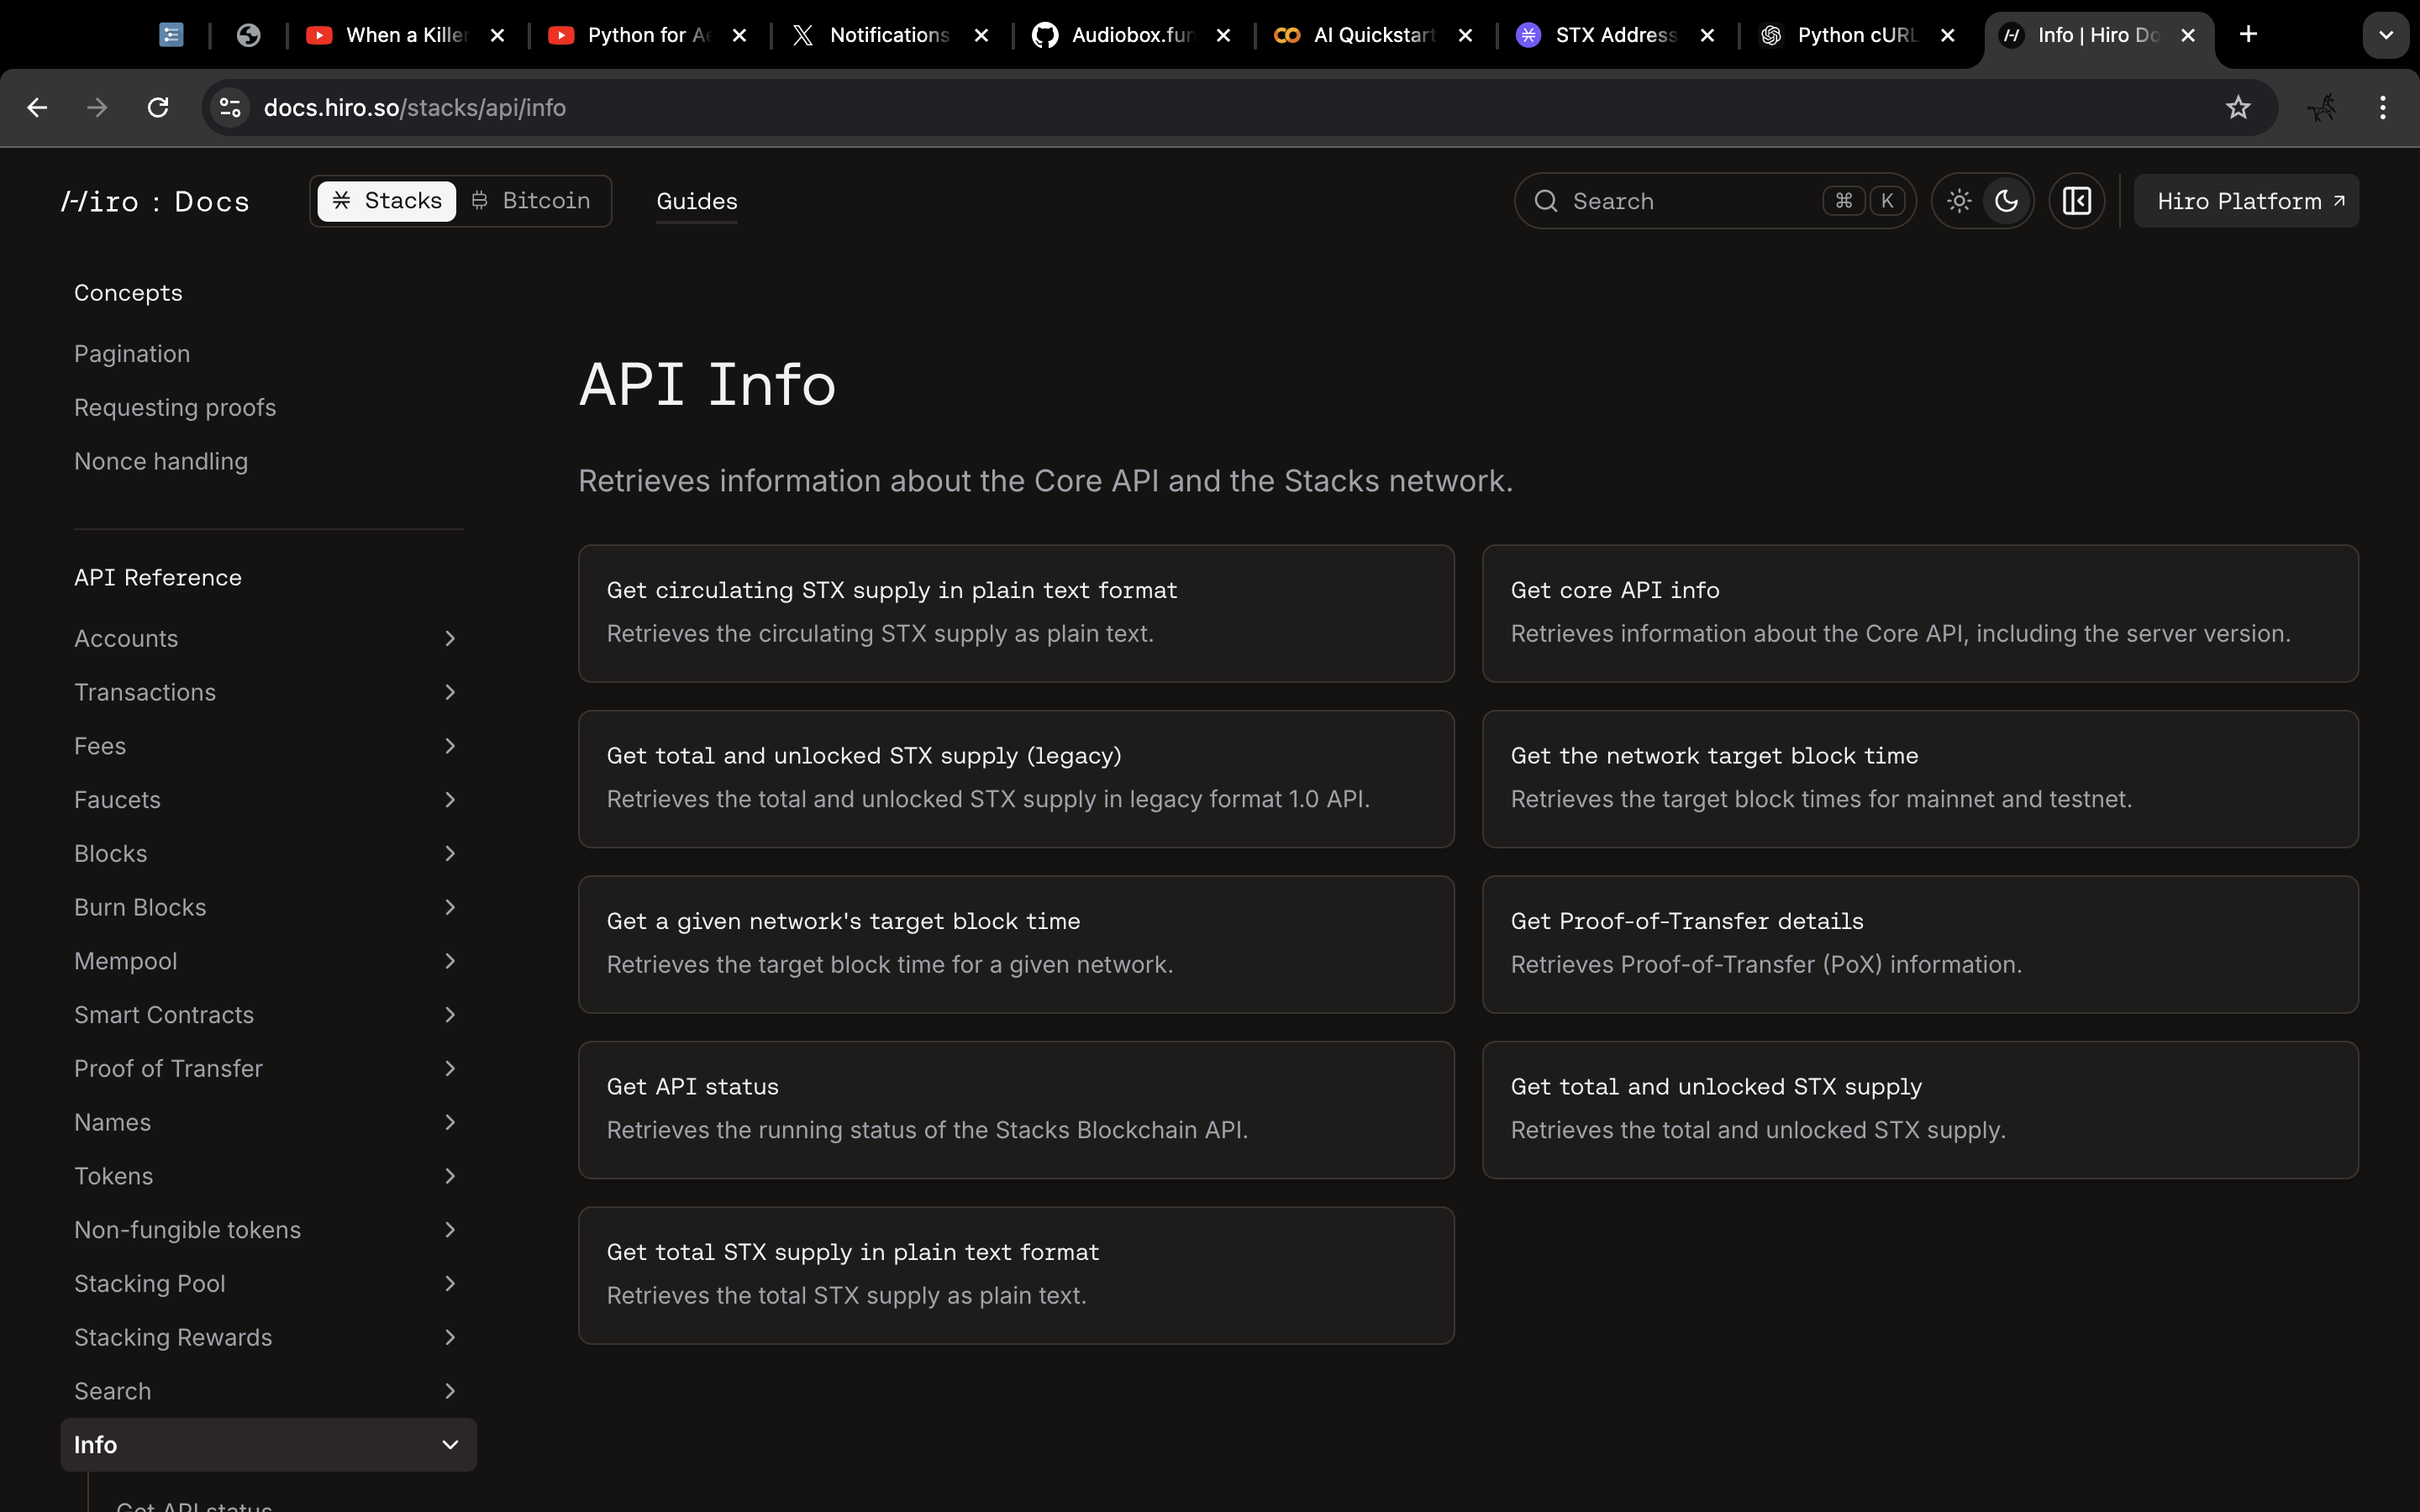

# 7.2 If I click on "Get Circulating STX Supply in plain text format" I get this: 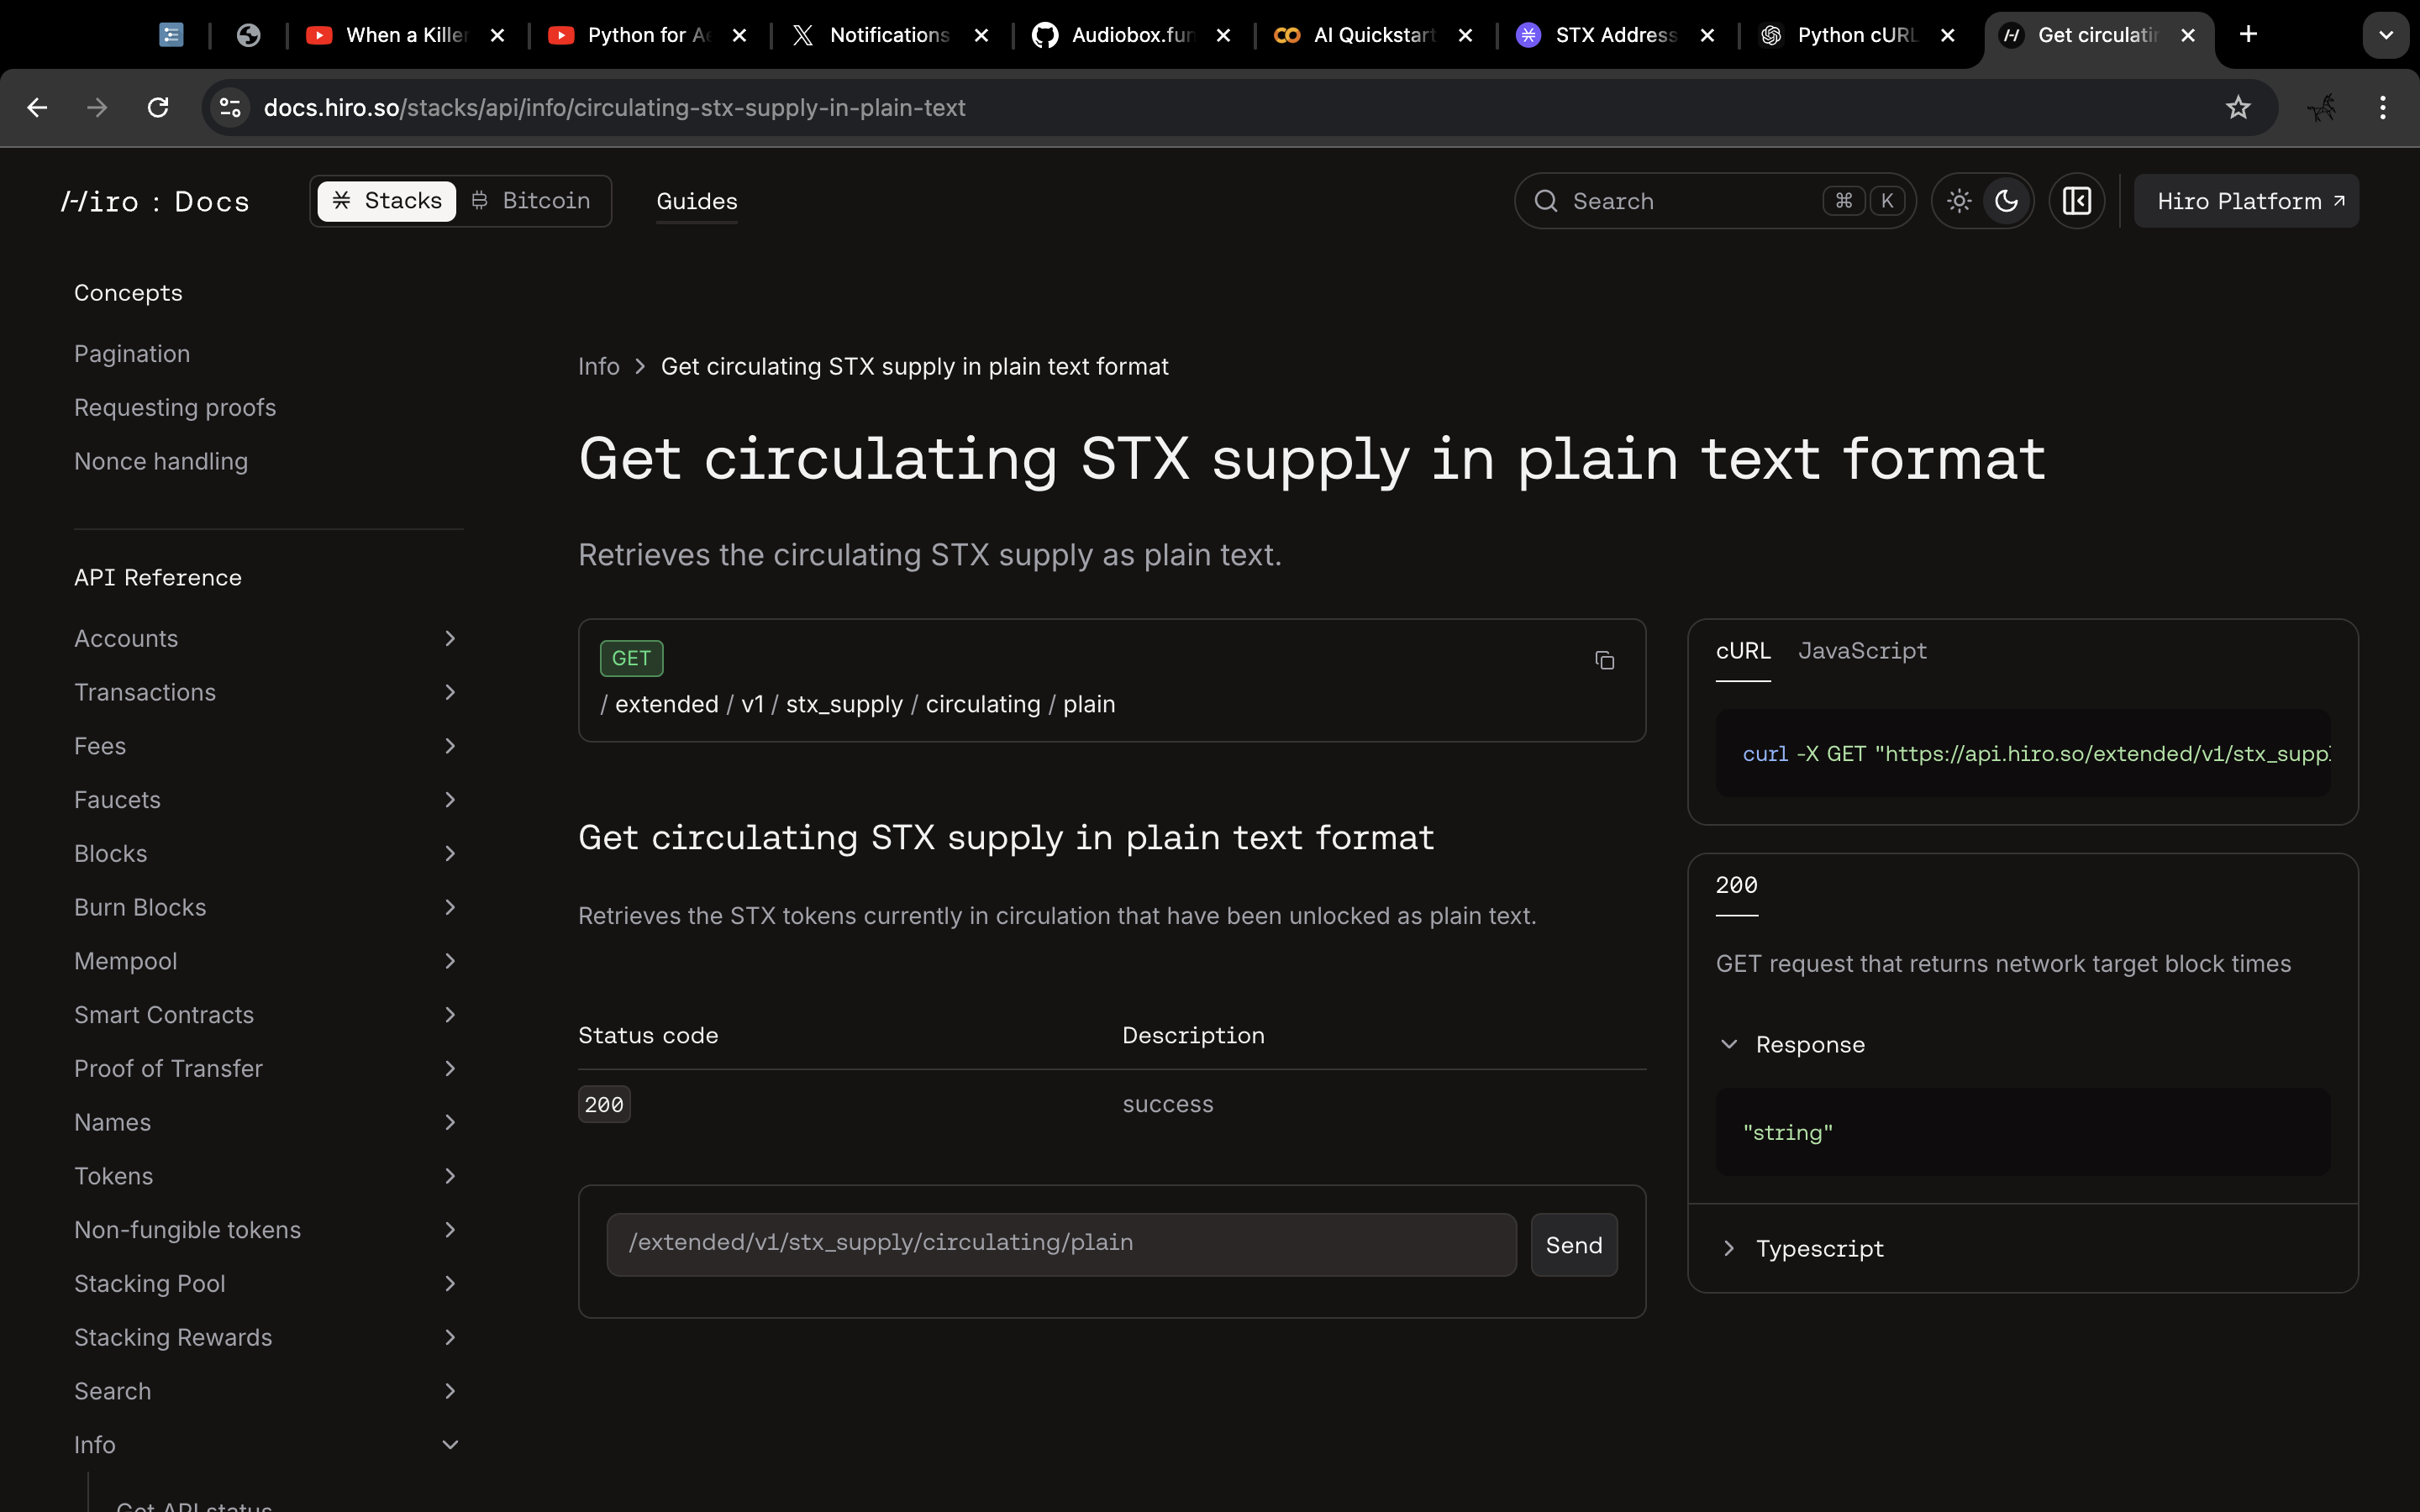

# Do you see that curl X Get "https://..."? on the right-hand side?

## I went to ChatGPT and entered in the following prompt: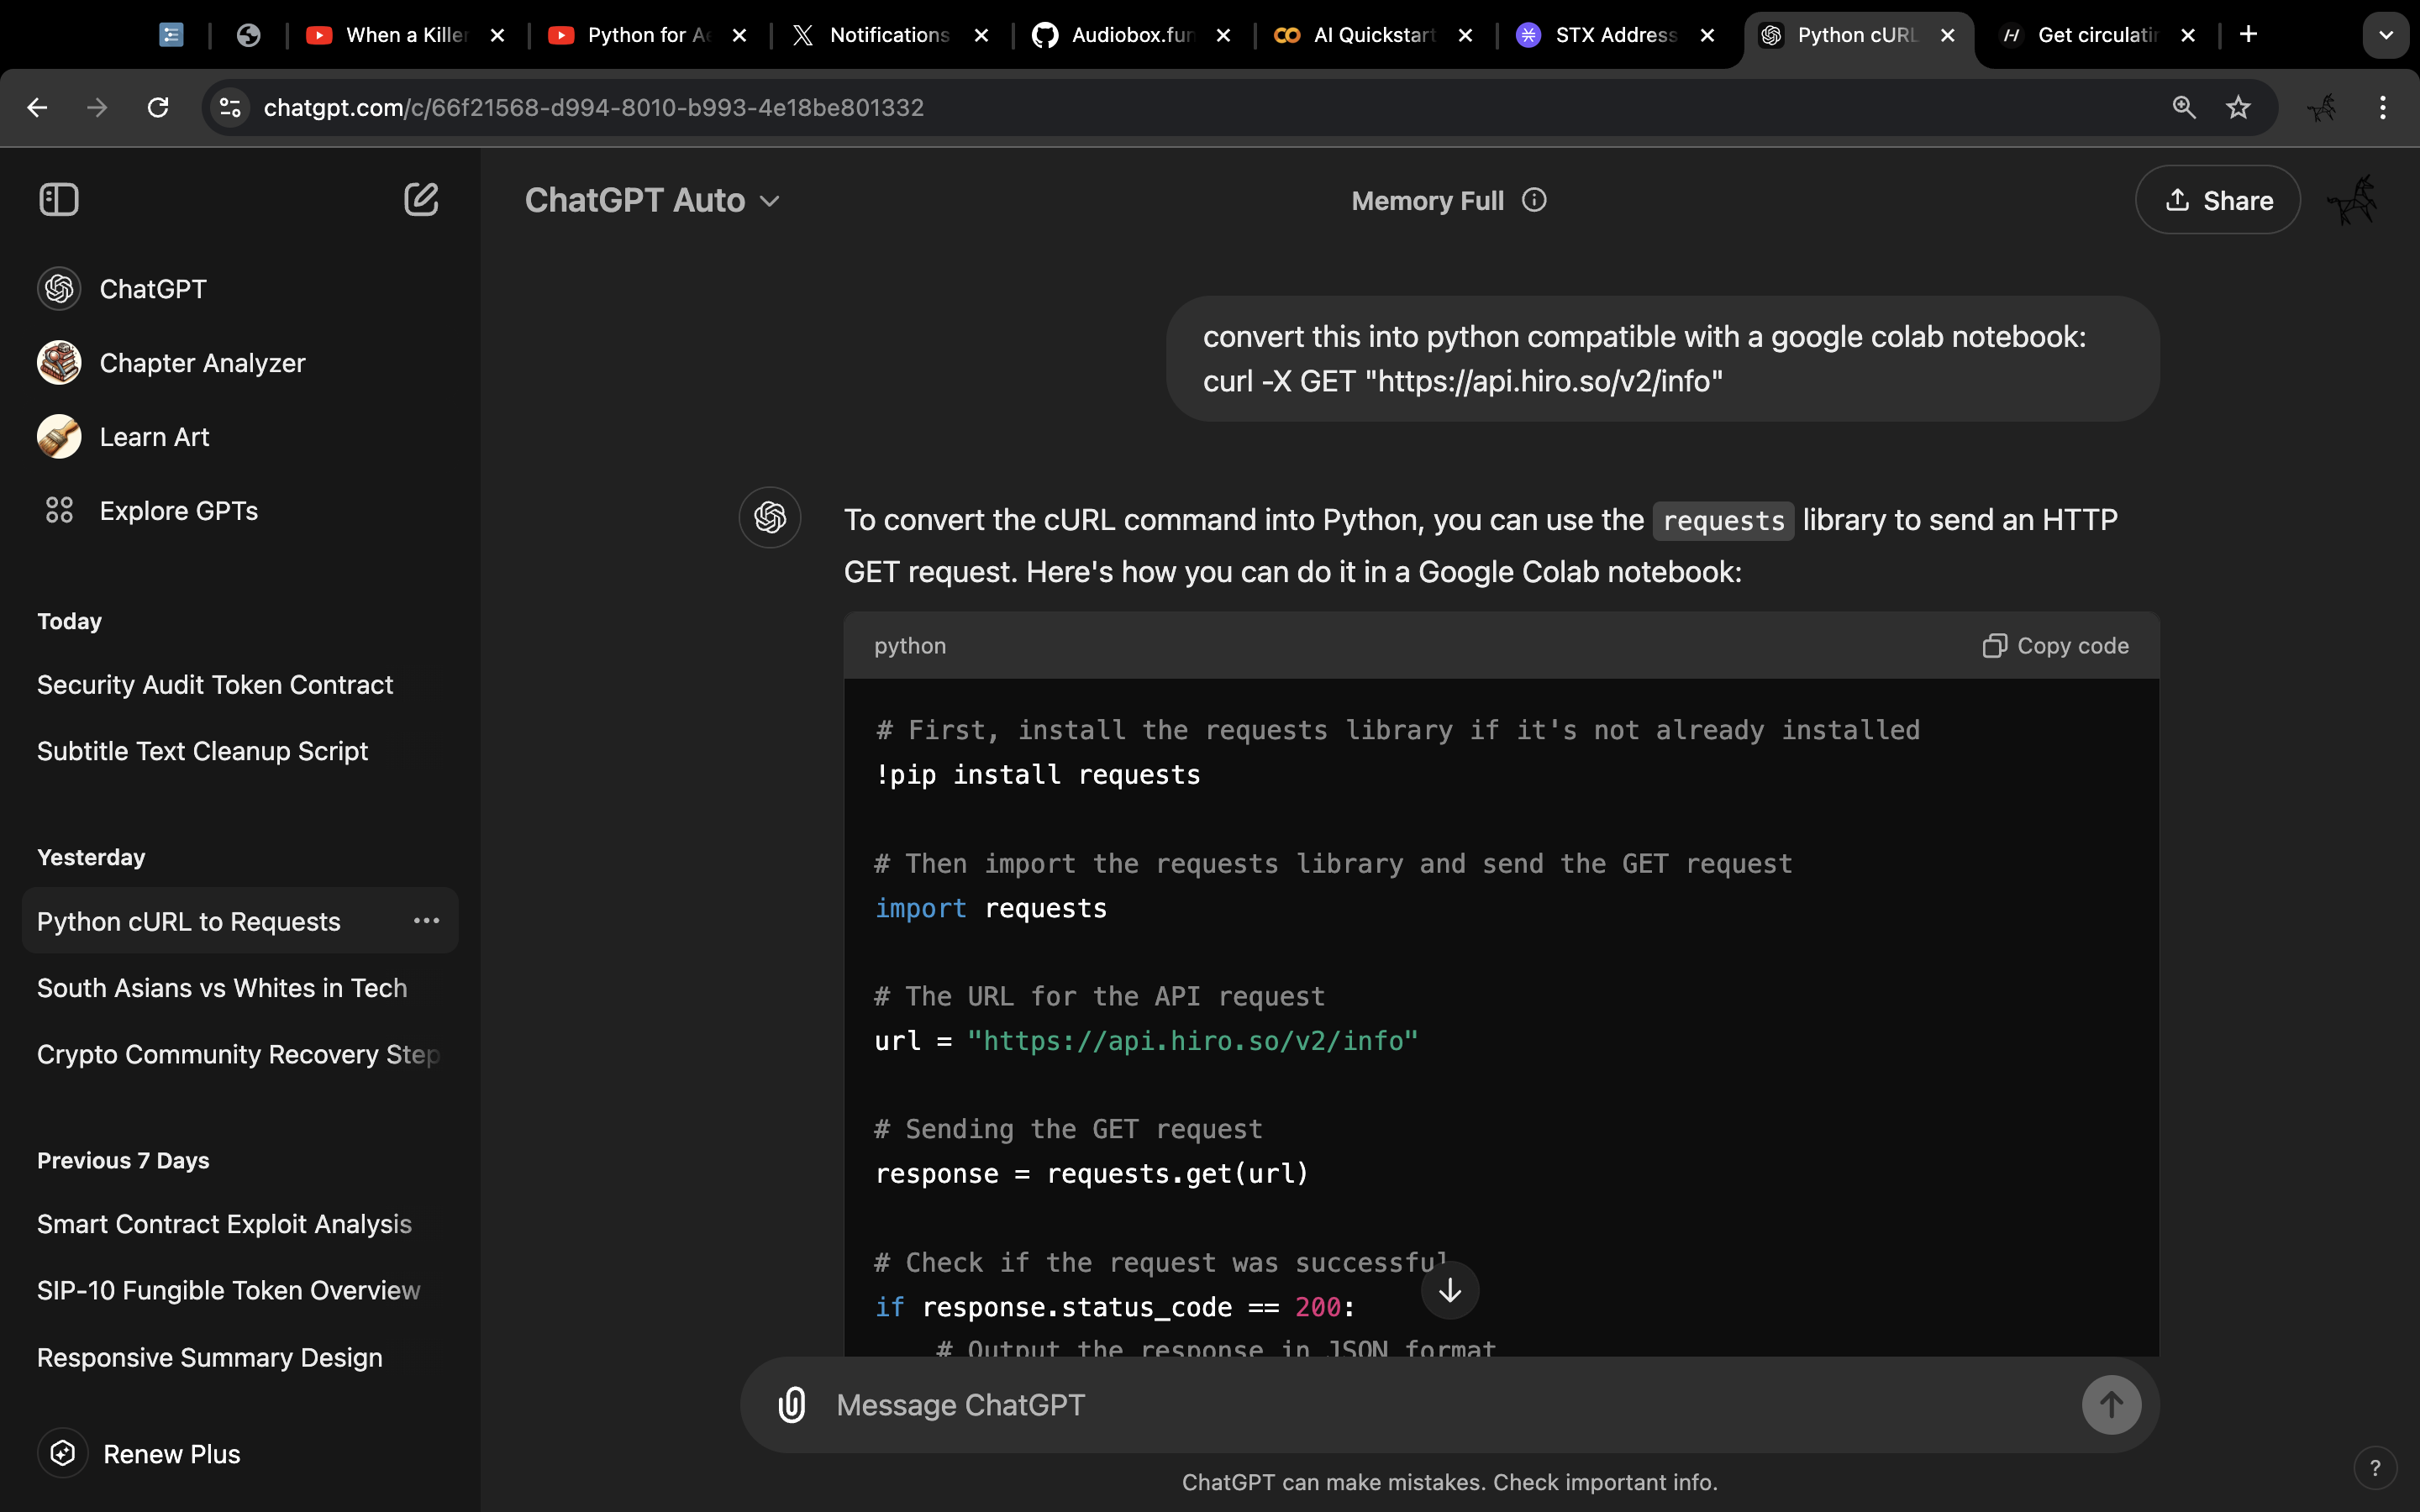

# 7.3 I pasted that python code into this Google Colab Notebook, which executes python programming commands without you having to download anything onto your machine.